In [53]:
# Portfolio project
# Here I will analyze the relationship, or lack thereof, between the price the S&P 500 index 
# and various measures of the economy:
        #  Net private saving: Households and Institutions(Measured in billions of dollars)
        #  Real M2 Money Supply (M2 money supply deflated with U.S. Consumer Price Index)

In [54]:
# Import some of the basic the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [55]:
# Import the S&P 500 data
sp500 = pd.read_csv('spx.csv')
print(sp500.head(-5))

           date    close
0     02-Jan-86   209.59
1     03-Jan-86   210.88
2     06-Jan-86   210.65
3     07-Jan-86   213.80
4     08-Jan-86   207.97
...         ...      ...
8182  18-Jun-18  2773.75
8183  19-Jun-18  2762.59
8184  20-Jun-18  2767.32
8185  21-Jun-18  2749.76
8186  22-Jun-18  2754.88

[8187 rows x 2 columns]


In [56]:
# Import Net private saving: Households and Institutions
net_savings = pd.read_csv('W986RC1Q027SBEA.csv')
print(net_savings.head(-5))

           DATE  W986RC1Q027SBEA
0    1947-01-01           12.595
1    1947-04-01            8.476
2    1947-07-01           12.635
3    1947-10-01           10.372
4    1948-01-01           12.763
..          ...              ...
296  2021-01-01         3889.697
297  2021-04-01         1888.618
298  2021-07-01         1552.125
299  2021-10-01         1151.639
300  2022-01-01          703.749

[301 rows x 2 columns]


In [57]:
# Import U.S. M2 Money Supply data
m2 = pd.read_csv('M2REAL.csv')
print(m2.head(-5))

    realtime_start realtime_end        date   value
0       2019-12-11   2019-12-11  1959-01-01   987.9
1       2019-12-11   2019-12-11  1959-02-01   992.1
2       2019-12-11   2019-12-11  1959-03-01   998.3
3       2019-12-11   2019-12-11  1959-04-01  1001.0
4       2019-12-11   2019-12-11  1959-05-01  1006.2
..             ...          ...         ...     ...
720     2019-12-11   2019-12-11  2019-01-01  5716.7
721     2019-12-11   2019-12-11  2019-02-01  5713.2
722     2019-12-11   2019-12-11  2019-03-01  5703.5
723     2019-12-11   2019-12-11  2019-04-01  5703.6
724     2019-12-11   2019-12-11  2019-05-01  5734.6

[725 rows x 4 columns]


In [58]:
# Let's start by exploring our data, starting with the S&P 500 data

print(sp500.columns)
print(sp500.dtypes)
print(sp500.date.nunique(), len(sp500.date), len(sp500.close))
print('Missing values in the close column: ' + str(sp500.close.isna().sum()))
print('Missing values in the date column: ' + str(sp500.date.isna().sum()))
print(len(sp500.date.drop_duplicates()))




Index(['date', 'close'], dtype='object')
date      object
close    float64
dtype: object
8192 8192 8192
Missing values in the close column: 0
Missing values in the date column: 0
8192


Here we can see that the S&P 500 dataset contains two columns, day and closing price.  There are 8192 rows of data ranging from January 1986 to June 2018, reported daily.  The data seems pretty clean, with no missing values and no duplicate dates.

In [59]:
# Next we'll explore the net private savings data.

#Formate the date column for consistency and rename column to nps for easier readability.
net_savings = net_savings.rename({'W986RC1Q027SBEA': 'nps', 'DATE': 'date'}, axis=1)
net_savings = net_savings.loc[:,~net_savings.columns.duplicated()]
print(net_savings.columns)
print(net_savings.dtypes)
print(net_savings.date.nunique(), len(net_savings.date), len(net_savings.nps))
print('Missing values in the nps column: ' + str(net_savings.nps.isna().sum()))
print('Missing values in the date column: ' + str(net_savings.date.isna().sum()))
print(len(net_savings.date.drop_duplicates()))

Index(['date', 'nps'], dtype='object')
date     object
nps     float64
dtype: object
306 306 306
Missing values in the nps column: 0
Missing values in the date column: 0
306


Here we can see that the Net Private Saving for Househoulds and Institutions dataset contains two columns, day and nps(representing the net private savings measured in billions of dollars.  There are 306 rows of data ranging from January 1947 to January 2022, reported quarterly.  The data seems pretty clean, with no missing values and no duplicate dates.

In [60]:
# Next we'll explore the U.S. M2 Money Supply data.


# Update the dataframe to only inculde relevant columns
m2 = m2[['date', 'value']]
print(m2.columns)
print(m2.dtypes)
print(m2.date.nunique(), len(m2.date), len(m2.value))
print('Missing values in the value column: ' + str(m2.value.isna().sum()))
print('Missing values in the date column: ' + str(m2.date.isna().sum()))
print(len(m2.date.drop_duplicates()))

Index(['date', 'value'], dtype='object')
date      object
value    float64
dtype: object
730 730 730
Missing values in the value column: 0
Missing values in the date column: 0
730


Here we can see that the real M2 money supply dataset contains two columns, day and value, representing the inflation adjusted M2 money supply.  There are 730 rows of data ranging from January 1959 to May 2019, reported quarterly.  The data seems pretty clean, with no missing values and no duplicate dates.

In [61]:
# The dates are formated differenly in each dataframe, let's make them all the same so we can merge them on the date.

sp500['date'] = pd.to_datetime(sp500['date'])
net_savings['date'] = pd.to_datetime(net_savings['date'])
m2['date'] = pd.to_datetime(m2['date'])

print(net_savings.head())
print(sp500.head())
print(m2.head())

/var/folders/rz/3_0lyjqx7yl1zlv8h37zrqnh0000gn/T/ipykernel_63939/806479609.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500['date'] = pd.to_datetime(sp500['date'])


        date     nps
0 1947-01-01  12.595
1 1947-04-01   8.476
2 1947-07-01  12.635
3 1947-10-01  10.372
4 1948-01-01  12.763
        date   close
0 1986-01-02  209.59
1 1986-01-03  210.88
2 1986-01-06  210.65
3 1986-01-07  213.80
4 1986-01-08  207.97
        date   value
0 1959-01-01   987.9
1 1959-02-01   992.1
2 1959-03-01   998.3
3 1959-04-01  1001.0
4 1959-05-01  1006.2


In [62]:
#  Merge the dataframes on the date so we can plot them.  Unfortunately, not all of our datasets are recorded daily, 
# so we will only have data for form the least frequently recorded dataset.

merged_df1 = pd.merge(sp500, m2, on='date', how='inner')
print(merged_df1.head(-5))
print(len(merged_df1))


          date    close   value
0   1986-04-01   235.14  2353.1
1   1986-05-01   235.16  2371.4
2   1986-07-01   252.04  2398.7
3   1986-08-01   234.91  2414.7
4   1986-10-01   233.60  2438.7
..         ...      ...     ...
238 2017-05-01  2388.33  5542.2
239 2017-06-01  2430.06  5549.5
240 2017-08-01  2476.35  5573.2
241 2017-09-01  2476.55  5566.5
242 2017-11-01  2579.36  5583.4

[243 rows x 3 columns]
248


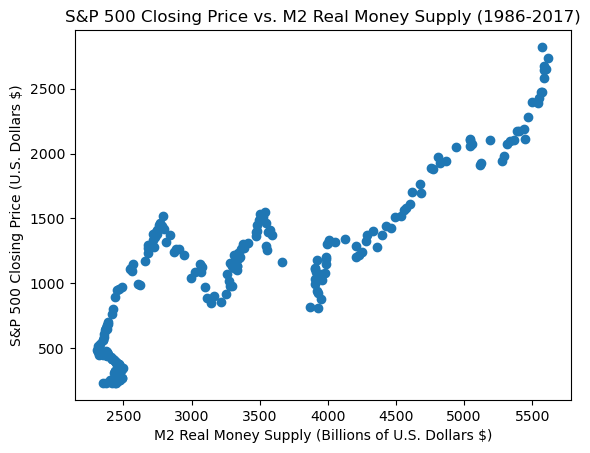

<Figure size 640x480 with 0 Axes>

In [63]:
#  Use a scatter plot to visualize the relationship between S&P 500 closing price and M2 Real Money Supply

plt.scatter(merged_df1.value, merged_df1.close)
plt.title('S&P 500 Closing Price vs. M2 Real Money Supply (1986-2017)')
plt.ylabel('S&P 500 Closing Price (U.S. Dollars $)')
plt.xlabel('M2 Real Money Supply (Billions of U.S. Dollars $)')
plt.show()
plt.clf()

In [64]:
#  Merge the dataframes on the date so we can plot them.  Unfortunately, not all of our datasets are recorded daily, 
# so we will only have data for form the least frequently recorded dataset.

merged_df2 = pd.merge(sp500, net_savings, on='date', how='inner')
print(merged_df2.head(-5))
print(len(merged_df2))

         date    close      nps
0  1986-04-01   235.14  310.378
1  1986-07-01   252.04  279.490
2  1986-10-01   233.60  262.722
3  1987-04-01   292.39  216.931
4  1987-07-01   302.94  244.481
..        ...      ...      ...
56 2013-07-01  1614.96  652.167
57 2013-10-01  1695.00  569.795
58 2014-04-01  1885.52  715.105
59 2014-07-01  1973.32  714.945
60 2014-10-01  1946.16  750.067

[61 rows x 3 columns]
66


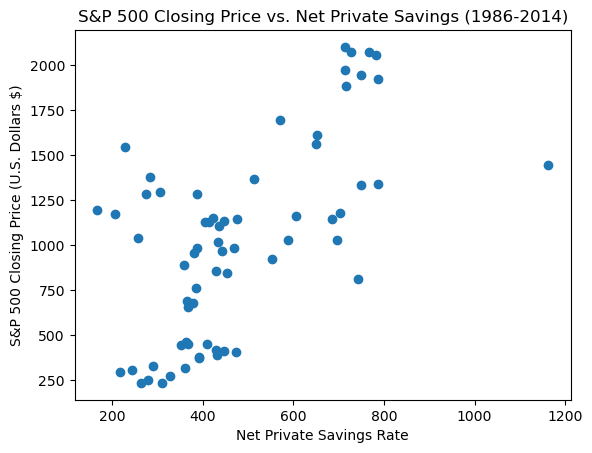

<Figure size 640x480 with 0 Axes>

In [65]:
#  Use a scatter plot to visualize the relationship between S&P 500 closing price and net private savings for 
# households and institutions.

plt.scatter(merged_df2.nps, merged_df2.close)
plt.title('S&P 500 Closing Price vs. Net Private Savings (1986-2014)')
plt.ylabel('S&P 500 Closing Price (U.S. Dollars $)')
plt.xlabel('Net Private Savings Rate')
plt.show()
plt.clf()

Now that we can visualize these two relationships, let's run a linear regression model to measure the correlation.



Intercept   -729.980475
value          0.542775
dtype: float64


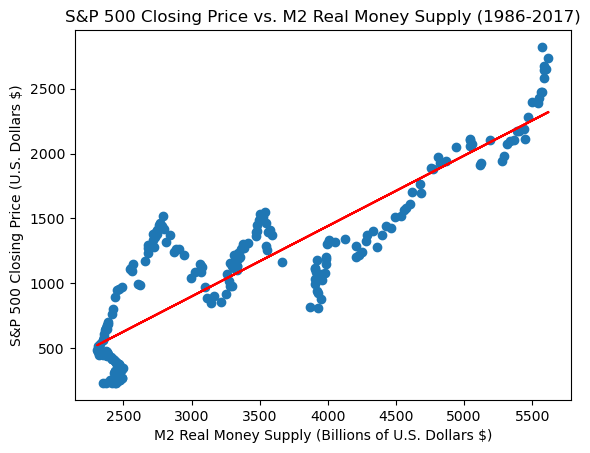

<Figure size 640x480 with 0 Axes>

In [66]:
import statsmodels.api as sm

# Generate the linear regression model

model = sm.OLS.from_formula('close ~ value', data = merged_df1)
results = model.fit()
print(results.params)

x = merged_df1['value']
y_pred = results.params['Intercept'] + results.params['value'] * x

# Plot the regression line on top of the scatter plot

plt.scatter(merged_df1.value, merged_df1.close)
plt.plot(x, y_pred, color='red', label='Linear Regression')
plt.title('S&P 500 Closing Price vs. M2 Real Money Supply (1986-2017)')
plt.ylabel('S&P 500 Closing Price (U.S. Dollars $)')
plt.xlabel('M2 Real Money Supply (Billions of U.S. Dollars $)')
plt.show()
plt.clf()

Intercept    193.660807
nps            1.731770
dtype: float64


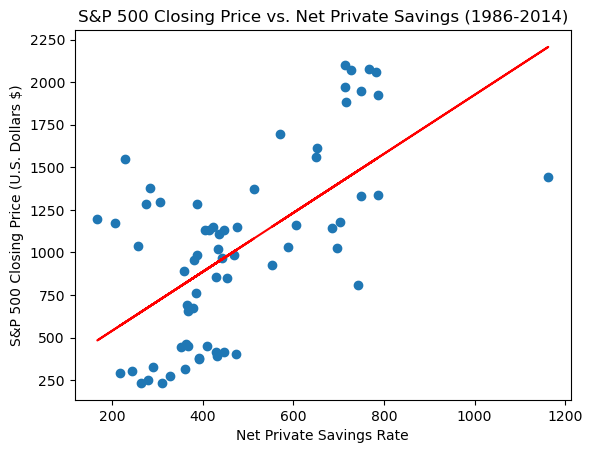

<Figure size 640x480 with 0 Axes>

In [67]:
model = sm.OLS.from_formula('close ~ nps', data = merged_df2)
results2 = model.fit()
print(results2.params)

# Generate the linear regression model

x2 = merged_df2['nps']
y_pred2 = results2.params['Intercept'] + results2.params['nps'] * x2

# Plot the regression line on top of the scatter plot

plt.scatter(merged_df2.nps, merged_df2.close)
plt.plot(x2, y_pred2, color='red', label='Linear Regression')
plt.title('S&P 500 Closing Price vs. Net Private Savings (1986-2014)')
plt.ylabel('S&P 500 Closing Price (U.S. Dollars $)')
plt.xlabel('Net Private Savings Rate')
plt.show()
plt.clf()


Our linear regression models are fit and plotted.  They both appear to show a positive correlation.  
Let's see which one is more accurate by comparing the residuals.  Then we can make sure the assumptions of
simple linear regression are met by checking linear funcitonal form, normality and homoscedastity.

In [68]:
fitted_values = results.predict(merged_df1)
residuals = merged_df1.close - fitted_values
print(residuals.head(-5))


0     -312.083797
1     -321.996583
2     -319.934345
3     -345.748748
4     -360.085352
          ...    
238    110.141882
239    147.909623
240    181.335852
241    185.172445
242    278.809545
Length: 243, dtype: float64


In [69]:
fitted_values2 = results2.predict(merged_df2)
residuals2 = merged_df2.close - fitted_values2
print(residuals2.head(-5))


0    -496.024095
1    -425.633186
2    -415.034867
3    -276.945390
4    -314.105652
         ...    
56    291.895991
57    514.585344
58    453.461855
59    541.538938
60    453.555714
Length: 61, dtype: float64


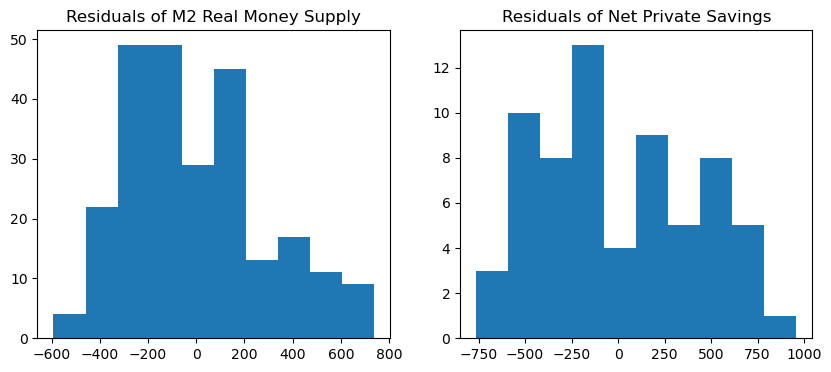

<Figure size 640x480 with 0 Axes>

In [70]:
# In order to satisfy the assumption of normality, we need to plot a histogram of the residuals to see if they are
# normally distributed.

plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.hist(residuals)
plt.title('Residuals of M2 Real Money Supply')
plt.subplot(1,2,2)
plt.hist(residuals2)
plt.title('Residuals of Net Private Savings')
plt.show()
plt.clf()

From the histograms plotted above we can see that distributions of the residuals aren't perfect bell curves.  The residuals examining the relationship between S&P 500 closing price and M2 Real Money Supply is close to a normal distribution and in my opinion satisfies the assumption of normality.  The residuals examining the relationship between S&P 500 and Net Private Savings is less normally distributed and its ability to satisfy the assumption of normality is arguable at best.  These results are not suprising based off the visual graphs, the line of best fit is clearly closer to the scatter points plotted above for M2 Real Money Supply.  Below I will try to quantify this visual difference by taking the sum of squares of the residuals, then averaging them because each model has a different number of datapoints.

In [71]:
residuals_squared = []
residuals2_squared = []

for i in residuals:
    squared = i * i
    residuals_squared.append(squared)
    
avg_square = sum(residuals_squared)/len(residuals_squared)

for i in residuals2:
    squared2 = i * i
    residuals2_squared.append(squared)
    
avg_square2 = sum(residuals2_squared)/len(residuals2_squared)


print('The average squared residual value for M2 Real Money Supply is ' + str(avg_square))
print('The average squared residual value for Net Private Savings is ' + str(avg_square2))

The average squared residual value for M2 Real Money Supply is 80692.13209174809
The average squared residual value for Net Private Savings is 172645.7627239612


This quantitatively shows that the linear regression model fitted for M2 Real Money Supply vs. S&P 500 closing price is a more accurate fit.

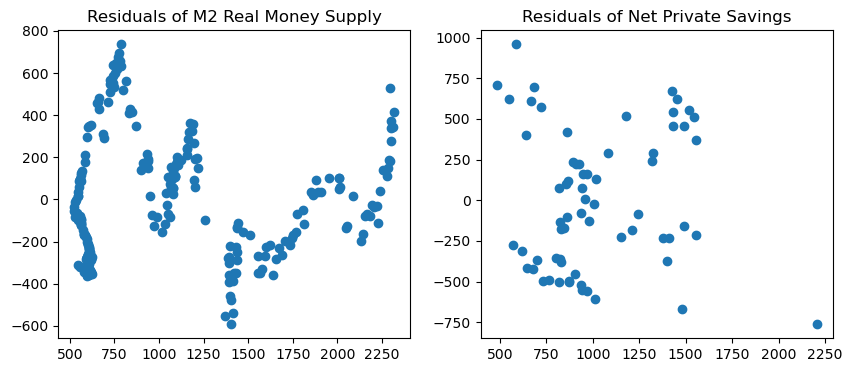

<Figure size 640x480 with 0 Axes>

In [72]:
# Plotting a scatter plot of the residuals t check for homoscedastity.  The scatterplot shouldl look random and
# centered around y=0.  There should be no patterns or asymmetry.

plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.scatter(fitted_values, residuals)
plt.title('Residuals of M2 Real Money Supply')
plt.subplot(1,2,2)
plt.scatter(fitted_values2, residuals2)
plt.title('Residuals of Net Private Savings')
plt.show()
plt.clf()

The above graphs are a little suprising.  Since it has already been established that M2 Real Money Supply is a better indicator of S&P 500 closing price than Net Private Savings, I would expect the scatterplot of the residuals to be less asymmetric for M2 Real Money Supply than Net Private Savings.  These scatterplots above show a clear pattern for M2 Real Money Supply and indicate that a linear regression model may not be appropriate.

Future Work:
    
   This work can be performed again using a dataset that recorded both M2 Real Money Supply and Net Private Savings each day, as opposed to quarterly or monthly.  This made the majority of the data in our S&P 500 dataset worthless.  Also, since our data ends in 2018, we can test our models on more current data to see how they fit.